In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data

df = pd.read_csv("listings_wrangled")
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,0.03,1,267,1,4,2.0,1.5 baths,"[""HDTV with Disney+, HBO Max, standard cable, ..."
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,0.73,1,0,0,1,1.0,1 shared bath,"[""Hair dryer"", ""Smoke alarm"", ""Carbon monoxide..."
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,0.30,2,322,0,2,1.0,NaN,"[""Heating"", ""Wifi"", ""Long term stays allowed"",..."
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,3.38,1,79,50,2,1.0,1 bath,"[""Shampoo"", ""Conditioner"", ""TV"", ""Drying rack ..."
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,0.31,3,365,1,1,NaN,1 bath,"[""Carbon monoxide alarm"", ""Stove"", ""Bathtub"", ..."


In [3]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9379
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
accommodates                         0
bedrooms                          3792
bathrooms_text                      47
amenities                            0
dtype: int64

To get a better understanding of the data, I will start of with answering a few questions.

> What is the average price, per night for a short-term renta in NYC based on the Airbnb listings data.

In [4]:
avg_price = round(df.price.mean(),2)
print(avg_price)

222.14


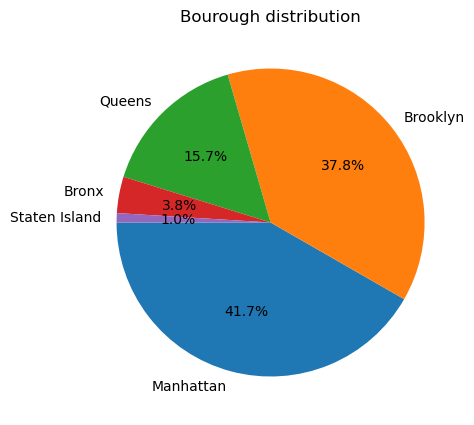

In [5]:
plt.figure(figsize=(9,5))
plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title("Bourough distribution")
plt.show()

c:\Users\Nizar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


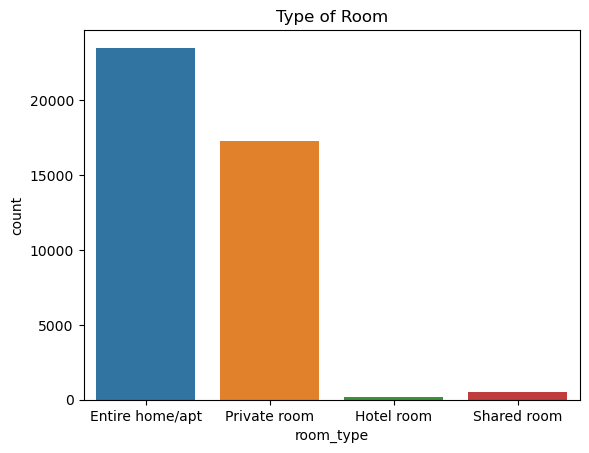

In [6]:
plt.figure()
plt.title("Type of Room")
sns.countplot(df.room_type)

plt.show()

Entire home/apt has the greatest share, followed by Private room. Shared rooms aren't too popular. Hotel room listings will be dropped.

In [7]:
df = df[df.room_type != 'Hotel room']

Room types on Neighborhood group

c:\Users\Nizar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


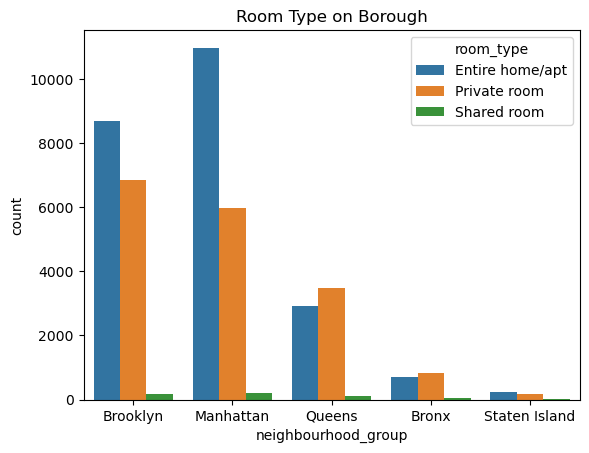

In [8]:
plt.figure()
plt.title("Room Type on Borough")
sns.countplot(df.neighbourhood_group, hue=df.room_type)
plt.show()

Interestingly, Queens and the Bronx residents are more likely to list a private room then the entire unit.

Next lets compare their availability.

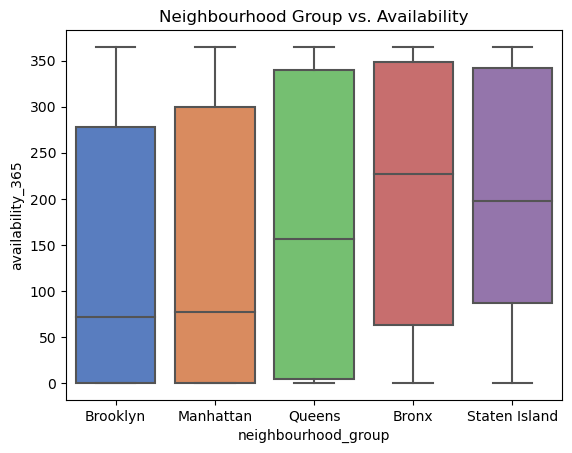

In [9]:
# plt.style.use('classic')
plt.figure()
plt.title("Neighbourhood Group vs. Availability")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="muted")
plt.show()

Next price distribution

In [10]:
df.price.describe()


count    41345.000000
mean       221.095296
std        921.149523
min         10.000000
25%         80.000000
50%        130.000000
75%        220.000000
max      98159.000000
Name: price, dtype: float64

In [11]:
print((df.price > 500).value_counts())
prop = len(df[df.price > 500]) / len(df)
print("Proportion of listings over $500: {:.2%}".format(prop))

False    38952
True      2393
Name: price, dtype: int64
Proportion of listings over $500: 5.79%


I took care of the "free" listings in an earlier step, but I haven't addressed the other outliers that are skewing the distribution. With a Max price over 400 times larger than the mean price, it will be difficult to meaningfully visualize the data. Since the 75th percentile is 220,  excluding any listings above $500 will allow me to better see the spread. Those listings represent nearly 6% of data though, so it is important not to draw any conclusions just yet. 

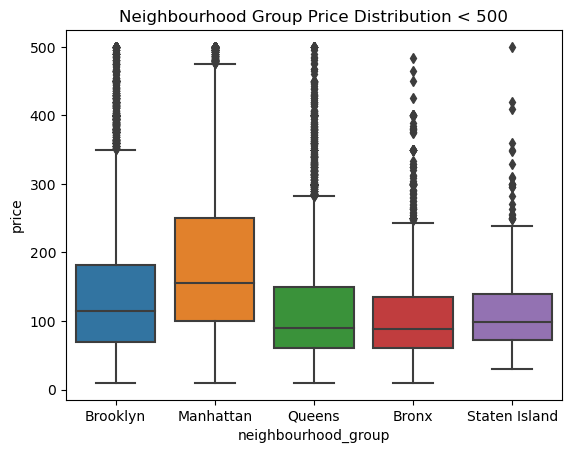

In [12]:
df_u500 = (df[df.price <= 500])
sns.boxplot(x='neighbourhood_group', y='price', data=df_u500)
plt.title('Neighbourhood Group Price Distribution < 500')
plt.show()


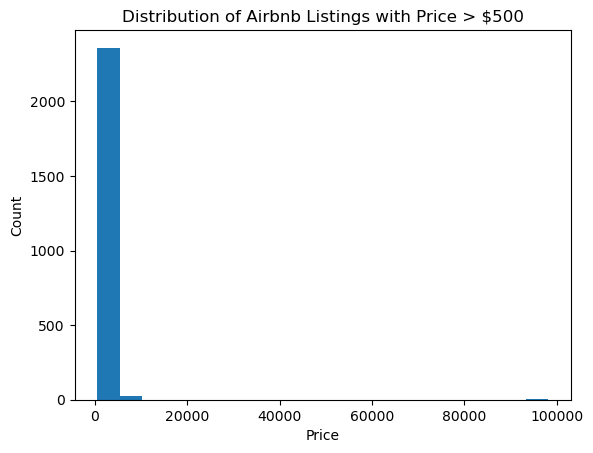

In [13]:
# Listings with price > $500?

df_o500 = (df[df.price > 500])
plt.hist(df_o500.price, bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Airbnb Listings with Price > $500')
plt.show()

Most of the datapoints are below $20000. I will inspect the high-priced listings and determine whether they should be kept in the dataset or not.

In [14]:
df[df['price'] >= 20000]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities
9256,15604499,The Parachute Loft Bedrm 1,62605071,Brooklyn,Coney Island,40.57717,-73.99986,Private room,75120,30,112,1.54,6,33,0,1,1.0,1 shared bath,"[""Carbon monoxide alarm"", ""Portable fans"", ""Pe..."
9645,16289102,"Comfy private room, great location to Manhattan",92493393,Staten Island,West Brighton,40.63304,-74.11275,Private room,65115,2,55,0.75,3,1,5,2,1.0,1 shared bath,"[""Carbon monoxide alarm"", ""Shampoo"", ""Private ..."
31497,563183407738604083,A cozy one bedroom in ocean hill Brooklyn...,422985413,Brooklyn,Bedford-Stuyvesant,40.68193,-73.91635,Entire home/apt,98159,2,3,0.61,1,62,3,2,1.0,1 bath,"[""Carbon monoxide alarm"", ""Portable fans"", ""Ho..."
37227,706066765395654135,Zll White Favorite Room,445395972,Bronx,Wakefield,40.88671,-73.86431,Entire home/apt,95110,2,0,NaN,5,36,0,2,1.0,1 bath,"[""Bed linens"", ""Central heating"", ""Smoke alarm..."


The third listing above is currently priced at $98 on Airbnb's website, which is suspcisiously similar to the price listed here at 98159. These listings are all definitely mispriced. There is no point in checking and adjusting each one individually, I will just drop them.

In [19]:
df = df.drop(df[df.price >= 20000].index)
print(f"New mean: {np.mean(df.price):.2f}")
print(f"New std: {np.std(df.price):.2f}")

New mean: 213.05
New std: 401.42


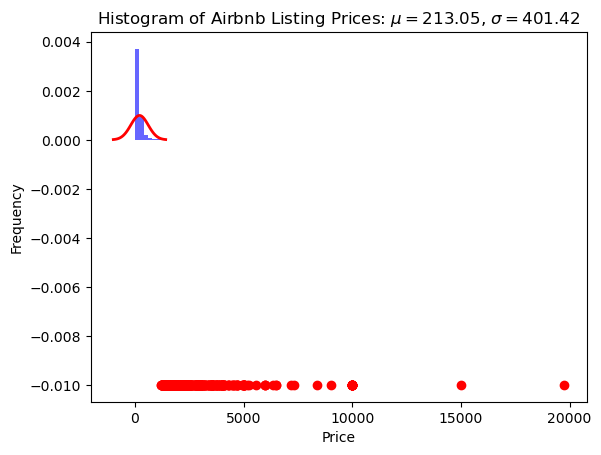

In [20]:
from scipy.stats import norm
prices = df.price
mu, sigma = norm.fit(prices)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax.hist(prices, bins=100, density=True, alpha=0.6, color='blue')
ax.plot(x, y, 'r', linewidth=2)
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title(r'Histogram of Airbnb Listing Prices: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

price_outliers = df[df['price'] > sigma*3]['price']
ax.plot(price_outliers, np.zeros_like(price_outliers) - 0.01, 'ro')

plt.show()

In [24]:
df[df.price > sigma*3]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities


In [22]:
df = df.drop(df.loc[df.price > sigma*3].index)

In [23]:
df.price.describe()

count    40747.000000
mean       178.064373
std        161.756725
min         10.000000
25%         80.000000
50%        130.000000
75%        211.000000
max       1200.000000
Name: price, dtype: float64

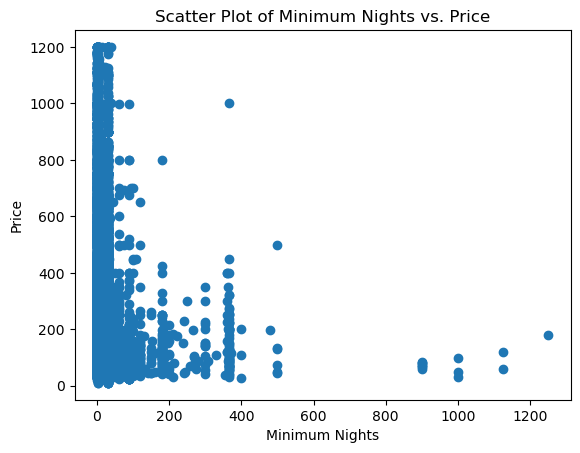

In [26]:
plt.scatter(df['minimum_nights'], df['price'])
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Scatter Plot of Minimum Nights vs. Price')
plt.show()

In [27]:
boroughs = df.groupby("neighbourhood_group")["price"].agg(["sum", "mean", "median", "count"])
boroughs = boroughs.round(2).sort_values("mean", ascending=False)
label_names = ["Budget", "Average", "Expensive", "Extravagant"]
ranges = [0, 69, 175, 350, np.inf]
df["price_range"] = pd.cut(df["price"], bins=ranges, labels=label_names)
# prices_by_borough = df.groupby(["neighbourhood_group", "price_range"])["price_range"].count()
df.price_range.value_counts(sort=False)

Budget          7799
Average        19102
Expensive       9942
Extravagant     3904
Name: price_range, dtype: int64

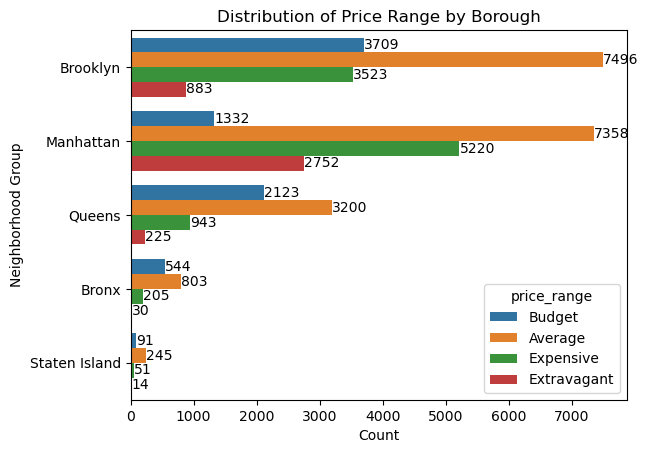

In [28]:
ax = sns.countplot(y='neighbourhood_group', hue='price_range', data=df)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel('Neighborhood Group')
plt.xlabel('Count')
plt.title('Distribution of Price Range by Borough')
plt.show()

In [30]:
df = df.rename(columns={'neighbourhood_group': 'borough'})

In [31]:
df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+)', expand=False).astype(float)

In [36]:
df.loc[df.bathrooms.isna()].bathrooms_text.value_counts()

Half-bath            37
Shared half-bath     17
Private half-bath    12
Name: bathrooms_text, dtype: int64

In [37]:
df.bathrooms.fillna(value=1, inplace=True)

Index(['id', 'name', 'host_id', 'borough', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'accommodates', 'bedrooms', 'bathrooms_text',
       'amenities', 'price_range', 'bathrooms'],
      dtype='object')

In [ ]:
# one_hot = pd.get_dummies(df['neighbourhood_group'])
# df = pd.concat([df, one_hot], axis=1)
# df.head()
# # features = list('price','bedrooms', '')

In [ ]:

# print(df.groupby(["bathrooms_text", "rooms"])["price_range"].count())
# df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)',expand=False).astype(float)
df.bathrooms_text.value_counts()